In [2]:
import pandas as pd
from vega_datasets import data
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = data.sf_temps()

In [3]:
df

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00
...,...,...
8754,50.4,2010-12-31 19:00:00
8755,49.9,2010-12-31 20:00:00
8756,49.4,2010-12-31 21:00:00
8757,48.8,2010-12-31 22:00:00


In [4]:
df = df.set_index('date')

In [5]:
df.resample('D').mean()

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167
2010-01-03,49.391667
2010-01-04,49.445833
2010-01-05,49.491667
...,...
2010-12-27,48.991667
2010-12-28,49.000000
2010-12-29,49.012500


<Axes: xlabel='date'>

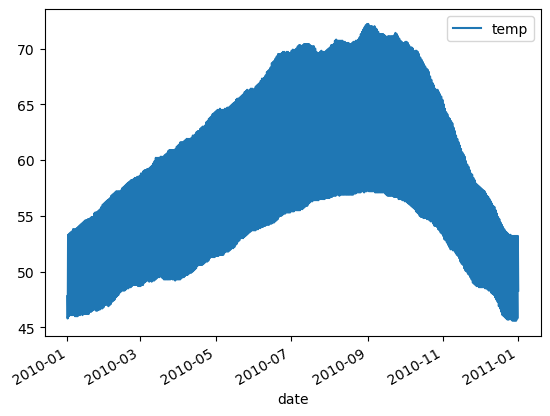

In [6]:
df = df.sort_index()
df.plot()

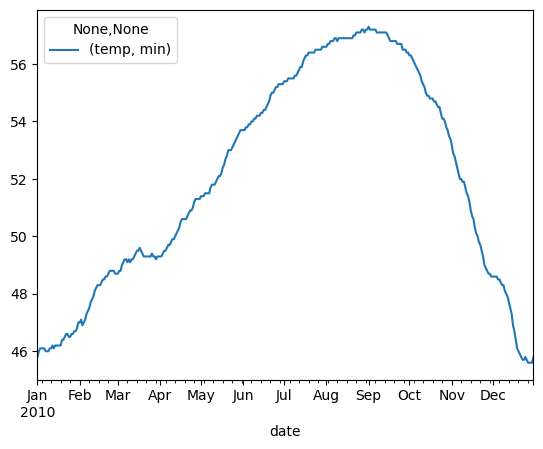

In [7]:
df = data.sf_temps()
df = df.set_index('date')
df = df.resample('D').agg(['min'])
df.plot()
plt.show()

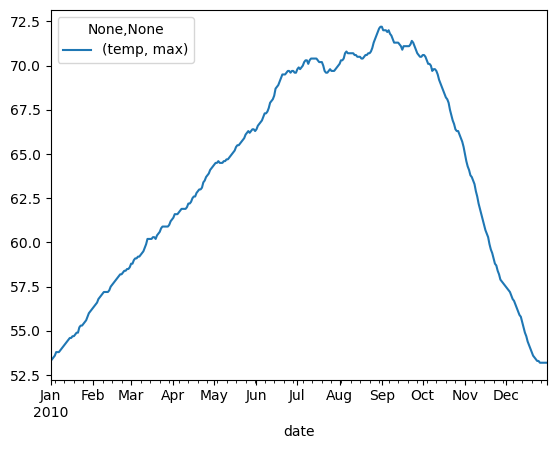

In [8]:
df = data.sf_temps()
df = df.set_index('date')
df = df.resample('D').agg(['max'])
df.plot()
plt.show()

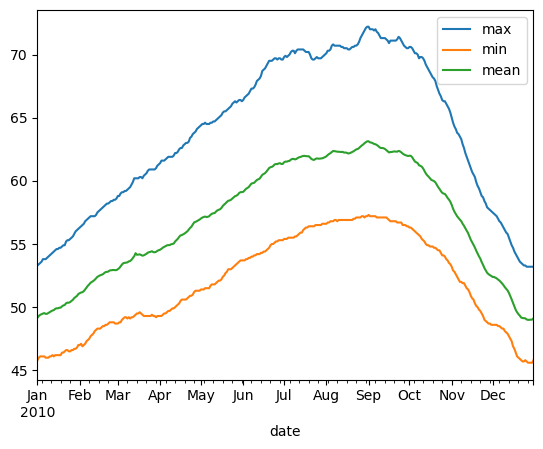

In [4]:
df = data.sf_temps()
df = df.set_index('date')
df = df.resample('D').agg(['max', 'min','mean'])
df.temp.plot()
plt.show()

In [192]:
df = data.sf_temps()
df = df.set_index('date')

coldest = df.resample('M').agg(['min']).min()
df = df.resample('M').agg(['min'])
df
# df[df == 45.6]
#december

,temp
,min
date,
2010-01-31,45.8
2010-02-28,46.9
2010-03-31,48.7
2010-04-30,49.3
2010-05-31,51.4
2010-06-30,53.7
2010-07-31,55.4
2010-08-31,56.6


# december

In [11]:
df = data.sf_temps()
df = df.set_index('date')

warmest = df.resample('M').agg(['max']).max()
df = df.resample('M').agg(['max'])
warmest

df[df == 72.2]
#august 
#september

,temp
,max
date,
2010-01-31,NaN
2010-02-28,NaN
2010-03-31,NaN
2010-04-30,NaN
2010-05-31,NaN
2010-06-30,NaN
2010-07-31,NaN
2010-08-31,72.2


# august 
# september

In [12]:
df = data.sf_temps()
df = df.set_index('date')
df = df.resample('M').agg(['min','max'])

In [13]:
df

temp      
             min   max
date                  
2010-01-31  45.8  56.2
2010-02-28  46.9  58.6
2010-03-31  48.7  61.3
2010-04-30  49.3  64.3
2010-05-31  51.4  66.4
2010-06-30  53.7  69.7
2010-07-31  55.4  70.4
2010-08-31  56.6  72.2
2010-09-30  56.4  72.2
2010-10-31  53.4  70.6
2010-11-30  48.6  65.0
2010-12-31  45.6  57.5

<Axes: xlabel='date'>

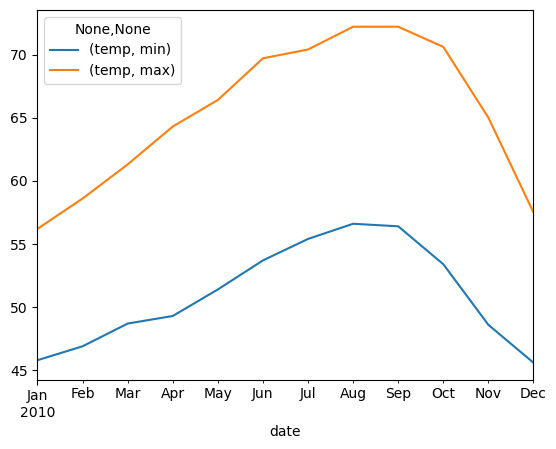

In [14]:
df.plot()

# may

In [15]:
df = data.sf_temps()
df = df.set_index('date')
df = df.resample('D').agg(['min','max'])

df.columns = df.columns.get_level_values(1)
df['difference'] = df['max'] - df['min']
df.max()

df[df['difference'] == df['difference'].max()]

# august 31st

,min,max,difference
date,,,
2010-08-31,57.2,72.2,15.0


# august 31st

In [5]:
df = data.seattle_weather()
df = df.set_index('date')
df = df.resample('M').agg(['sum'])
df[df.precipitation['sum'] == df.precipitation['sum'].max()]
# df

,precipitation,temp_max,temp_min,wind,weather
,sum,sum,sum,sum,sum
date,,,,,
2015-12-31,284.5,259.8,118.6,134.6,fogfogfogfogfogfogfogfogfogfogsunfogsunsunfogf...


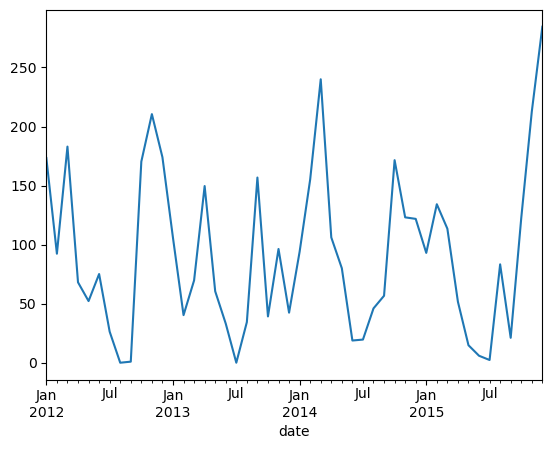

In [6]:
df = data.seattle_weather()
df = df.set_index('date')
df = df.resample('M').agg(['sum'])
df.precipitation['sum'].plot()
plt.show()

/var/folders/9q/9mllqnsn2vq07btq58zw9zzc0000gn/T/ipykernel_593/2188304447.py:3: FutureWarning: ['weather'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df = df.resample('M').agg(['mean'])


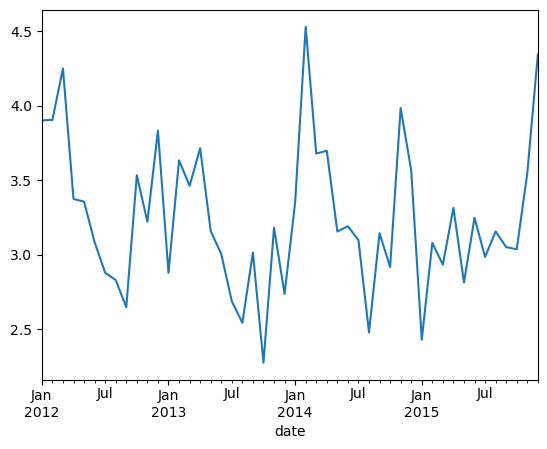

In [27]:
df = data.seattle_weather()
df = df.set_index('date')
df = df.resample('M').agg(['mean'])
df.wind['mean'].plot()
plt.show()


In [10]:
df = data.seattle_weather()
df = df.set_index('date')
df = df.resample('M').agg(['sum'])
df[df.wind['sum'] == df.wind['sum'].max()]

,precipitation,temp_max,temp_min,wind,weather
,sum,sum,sum,sum,sum
date,,,,,
2015-12-31,284.5,259.8,118.6,134.6,fogfogfogfogfogfogfogfogfogfogsunfogsunsunfogf...


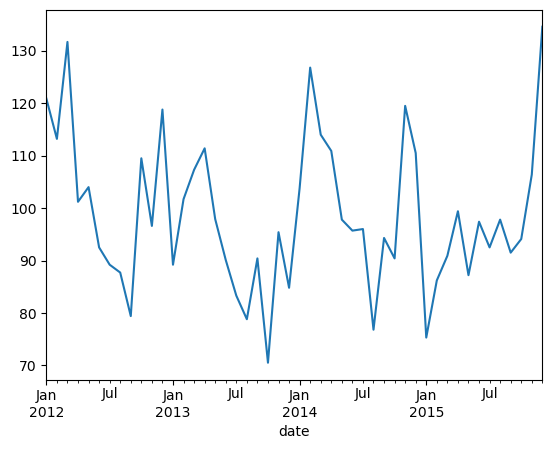

In [12]:
df.wind['sum'].plot()
plt.show()

In [98]:
df = data.seattle_weather()
df['year'] = df.date.dt.year
df = df[df.weather == 'sun']
df['weather'] = 1

df.groupby('year').sum()

/var/folders/9q/9mllqnsn2vq07btq58zw9zzc0000gn/T/ipykernel_593/1296216537.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('year').sum()


,precipitation,temp_max,temp_min,wind,weather
year,,,,,
2012,0.0,2387.7,1054.2,368.2,118
2013,140.8,3786.6,1877.5,554.5,205
2014,75.7,3927.6,1887.1,666.3,211
2015,22.9,3723.1,1803.9,546.5,180


# 2014

In [99]:
df = data.seattle_weather()
df['year'] = df.date.dt.year
df = df[df.weather == 'rain']
df['weather'] = 1

df.groupby('year').sum()

/var/folders/9q/9mllqnsn2vq07btq58zw9zzc0000gn/T/ipykernel_593/1156615805.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('year').sum()


,precipitation,temp_max,temp_min,wind,weather
year,,,,,
2012,1026.3,2446.2,1292.0,692.4,191
2013,214.2,637.3,318.0,228.8,60
2014,7.9,83.3,44.5,8.7,3
2015,73.4,92.7,53.4,21.1,5


# 2012

In [134]:
df = data.seattle_weather()
df = df[df.precipitation > 0]
df['month'] = df.date.dt.month
df.groupby('month').agg(['count'])

,date,precipitation,temp_max,temp_min,wind,weather
,count,count,count,count,count,count
month,,,,,,
1,66,66,66,66,66,66
2,73,73,73,73,73,73
3,73,73,73,73,73,73
4,59,59,59,59,59,59
5,34,34,34,34,34,34
6,37,37,37,37,37,37
7,11,11,11,11,11,11
8,22,22,22,22,22,22


In [146]:
df = data.flights_20k()


In [160]:
index = 0
for rows in df.delay:
    if rows < 0:
        df.at[index,'delay']=0
    index +=1
df


,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,0,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,0,550,MSY,MCO
4,2001-03-30 21:45:00,0,229,STL,IND
...,...,...,...,...,...
19995,2001-03-22 15:10:00,4,446,SAN,OAK
19996,2001-01-19 13:05:00,0,1489,SEA,MCI
19997,2001-02-07 11:37:00,0,1848,MCO,PHX
19998,2001-02-24 16:50:00,42,443,RDU,BNA


In [170]:
df['hour'] = df.date.dt.hour
largest_hour = df.groupby('hour').agg(['mean'])
largest_hour[largest_hour.delay['mean'] == largest_hour.delay['mean'].max()]

/var/folders/9q/9mllqnsn2vq07btq58zw9zzc0000gn/T/ipykernel_593/3548881716.py:2: FutureWarning: ['origin', 'destination'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  largest_hour = df.groupby('hour').agg(['mean'])


,date,delay,distance,month
,mean,mean,mean,mean
hour,,,,
3,2001-01-28 03:22:30,302.5,322.0,3.0


In [189]:
df['day'] = df.date.dt.strftime('%a')
answer = df.groupby('day').delay.agg(['mean'])
answer[answer['mean'] == answer['mean'].max()]


,mean
day,
Fri,17.757596


In [190]:
df['month'] = df.date.dt.strftime('%B')
largest_hour = df.groupby('month').agg(['mean'])
largest_hour[largest_hour.delay['mean'] == largest_hour.delay['mean'].max()]

/var/folders/9q/9mllqnsn2vq07btq58zw9zzc0000gn/T/ipykernel_593/1258036836.py:2: FutureWarning: ['origin', 'destination', 'day'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  largest_hour = df.groupby('month').agg(['mean'])


,date,delay,distance,hour
,mean,mean,mean,mean
month,,,,
February,2001-02-14 21:54:33.874680320,12.306106,511.15617,13.644182
